# Method of Relaxation in 2d

Maxwell's equations give us Laplace's equation for potential $\phi$ with no source charges: 

$$\nabla^2 \phi = 0 $$

in 2d this reads:

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0.
$$

We're choosing the 2d version simply because it is nicer to visualize. Since this is a PDE, we need to specify **boundary conditions** for $\phi$ along the edges of the box as opposed to initial conditions like we've seen for ODEs. Let's choose $\phi = V$ along the top of the box and $\phi = 0$ on the other sides.

Numerically we can approximate the 2nd partial x derivative of $\phi$ as:

$$
\frac{\partial^2 \phi}{\partial x^2} \approx \frac{\phi(x+h,y) + \phi(x-h,y) - 2\phi(x,y)}{h^2}
$$

for some small positive real number $h$.

We can write this for the y direction as well:

$$
\frac{\partial^2 \phi}{\partial y^2} \approx \frac{\phi(x,y+h) + \phi(x,y-h) - 2\phi(x,y)}{h^2}
$$

Adding these gives us Laplace's equation:

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}  = \frac{\phi(x+h,y) + \phi(x-h,y) - 2\phi(x,y) + \phi(x,y+h) + \phi(x,y-h) - 2\phi(x,y)}{h^2} = 0 
$$

or more simply:

$$
\phi(x+h,y) + \phi(x-h,y) + \phi(x,y+h) + \phi(x,y-h) - 4\phi(x,y)= 0 
$$

We want to know $\phi(x,y)$ and this equation thankfully has a $\phi(x,y)$ term so we can solve for it:

$$
\phi(x,y) = \frac{1}{4}\left[\phi(x+h,y) + \phi(x-h,y) + \phi(x,y+h) + \phi(x,y-h) \right]
$$

This is saying that we can approximate $\phi(x,y)$ by the average of the grid points that surround it, which should feel intuitive. Here comes the clever bit for how we turn this into a solver - We first the boundary points of our grid to our boundary conditions and set all the interior points to zero. Then we use this equation to update each interior point by its neighbors, that is:

$$
\phi_{k+1}(x,y) = \frac{1}{4}\left[\phi_{k}(x+h,y) + \phi_{k}(x-h,y) + \phi_{k}(x,y+h) + \phi_{k}(x,y-h) \right]
$$

Then we iterate this process, for many values of $i$ until our system converges (If it converges! This method isn't garunteed to converge.). To check for convergence, we can calculate the change $\delta = |\phi_{k+1}(x,y) - \phi(x,y)|$ and terminate the algorithm when $\delta$ is sufficiently small.

## Implementing the method in python:

Let's choose $V = 1$ volt with a grid spacing of $h = 0.01 m$ and a box with $1m$ long sides. Some code for the relaxation method might look like:


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# constants and parameters
L = 1
h = 0.01
V = 1
N = int(L/0.01)
tol = 1e-5

# setup phi, phiprime arrays
phi = np.zeros((N+1,N+1))
phiprime = np.copy(phi) # to play the part of phi (k+1)

# boundary condition
phi[0,:] = V 

k = 0 # track number of iterations
delta = 1.0 # initial delta

while delta > tol: # run until converged

    for i in range(N+1):
        for j in range(N+1):
            if i == 0 or i == N or j == 0 or  j == N: # don't update boundary
                phiprime[i,j] = phi[i,j]
            else:
                # relaxation update equation
                phiprime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) 

    # find max difference for delta
    delta = np.abs(phi-phiprime).max()

    # swap arrays to keep iterating
    phi,phiprime = phiprime,phi 
    
    # track iterations
    k += 1
    if k%500 == 0 or k ==1:
        print("iter:",k,"delta:",delta)         
    delta = np.abs(phi-phiprime).max()

print(k)
plt.imshow(phi)
plt.show()

iter: 1 delta: 0.25


iter: 500 delta: 0.00048243008996595727


iter: 1000 delta: 0.000229620021960808


iter: 1500 delta: 0.00013941050635341012


iter: 2000 delta: 9.341822623809559e-05


iter: 2500 delta: 6.633821733703638e-05


iter: 3000 delta: 4.888935877228606e-05


iter: 3500 delta: 3.692387262205221e-05


KeyboardInterrupt: 

Now we can "upgrade" to the Poisson equation:

$$\nabla^2 \phi = -\frac{\rho}{\epsilon_0}$$

Where $\rho$ is a **charge density**.

Substituting our 2nd partial derivative equations gives us:

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}  = \frac{\phi(x+h,y) + \phi(x-h,y) - 2\phi(x,y) + \phi(x,y+h) + \phi(x,y-h) - 2\phi(x,y)}{h^2} = -\frac{\rho}{\epsilon_0}
$$

Which in turn gives us the update equation:

$$
\phi_{k+1}(x,y) = \frac{1}{4}\left[\phi_{k}(x+h,y) + \phi_{k}(x-h,y) + \phi_{k}(x,y+h) + \phi_{k}(x,y-h) \right] + \frac{h^2}{4\epsilon_0} \rho(x,y)
$$

With a couple minor edits to our previous code, we can implement this (warning: this takes a long time to converge).

iter: 1 delta: 28235.825615541005
iter: 500 delta: 6832.1411354132
iter: 1000 delta: 3251.0140515118837
iter: 1500 delta: 1711.4857647046447
iter: 2000 delta: 917.3925458248705
iter: 2500 delta: 493.9909758400172
iter: 3000 delta: 266.3548976704478
iter: 3500 delta: 143.67581759020686
iter: 4000 delta: 77.51158285886049
iter: 4500 delta: 41.818661987781525
iter: 5000 delta: 22.562173744663596
iter: 5500 delta: 12.172908741980791
iter: 6000 delta: 6.567631067708135
iter: 6500 delta: 3.5434269327670336
iter: 7000 delta: 1.9117818996310234
iter: 7500 delta: 1.0314620584249496
iter: 8000 delta: 0.5565038658678532
iter: 8500 delta: 0.30025007389485836
iter: 9000 delta: 0.16199367865920067
iter: 9500 delta: 0.08740031719207764
iter: 10000 delta: 0.047155024483799934
iter: 10500 delta: 0.02544150874018669
iter: 11000 delta: 0.013726437464356422
iter: 11500 delta: 0.007405813783407211
iter: 12000 delta: 0.0039956532418727875
iter: 12500 delta: 0.002155773341655731
iter: 13000 delta: 0.00116310

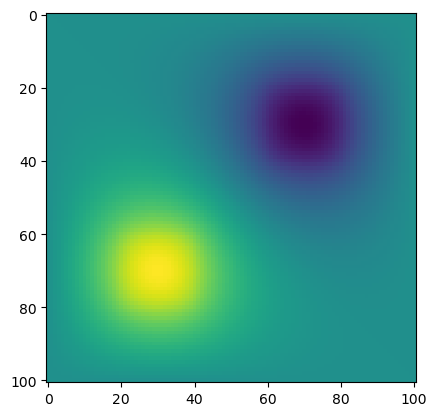

In [29]:
# constants and parameters
L = 1
h = 0.01
V = 1
N = int(L/0.01)
tol = 1e-5
epsilon0 = 8.854e-12

# setup phi, phiprime arrays
phi = np.zeros((N+1,N+1))
phiprime = np.copy(phi) # to play the part of phi (k+1)

def rho(i,j):
    x = i * h
    y = j * h
    if x >= 0.6 and x <= 0.8 and y >= 0.2 and y <= 0.4:
        return 0.01
    elif x >= 0.2 and x <= 0.4 and y >= 0.6 and y <= 0.8:
        return -0.01
    else:
        return 0.

k = 0 # track number of iterations
delta = 1.0 # initial delta

while delta > tol: # run until converged

    for i in range(N+1):
        for j in range(N+1):
            if i == 0 or i == N or j == 0 or  j == N: # don't update boundary
                phiprime[i,j] = phi[i,j]
            else:
                # relaxation update equation
                phiprime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) + h**2 / (4 * epsilon0) * rho(i,j)

    # find max difference for delta
    delta = np.abs(phi-phiprime).max()

    # swap arrays to keep iterating
    phi,phiprime = phiprime,phi 
    
    # track iterations
    k += 1
    if k%500 == 0 or k ==1:
        print("iter:",k,"delta:",delta)         
    delta = np.abs(phi-phiprime).max()

print(k)
plt.imshow(phi)
plt.show()